<div style='text-aling:center'>
<h1>Trabalho de DataClean e Classificação</h1>
</div>
<img  src="indice.png">


<h4>Aluno: <b>Cícero Moura</b></h4></p>
<p>Trabalho realizado para a disciplina de Inteligência Artificial do 7º de Sistemas de Informação, sob a orientação do professor Sanderson Marcedo.<br>
Objetivo: Realizar o DataClean do Arquivo CSV que contém informações sobre alunos e realizar a predição através de Machine Learning se um determinado aluno vai evadir do seu curso ou se ele vai ser aprovado ou reprovado. Medir desempenho usando a técnica de acurácia.
</p>

<p>Importando as bibliotecas</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl

%matplotlib inline

<p>Importando CSV para DataFrame e Conhecendos os dados</p>

In [2]:
df = pd.read_csv("curso1.csv");

In [3]:
df.head()

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,...,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
0,0,0.0,0.0,NaN,E,2014.0,NaN,S,NaN,M,...,1.0,1.0,1.0,1.0,6.70,NaN,648,54,2016,20.0
1,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,2.0,3.0,3.0,3.0,10.00,NaN,648,54,2016,21.0
2,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,1.0,1.0,1.0,1.0,10.00,NaN,648,54,2016,21.0
3,0,0.0,0.0,0.0,P,2014.0,0.0,NaN,0.0,M,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0
4,0,0.0,0.0,0.0,NaN,NaN,0.0,S,0.0,F,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0


In [4]:
df.columns

Index([u'SIT_MATRICULA', u'PAI_FALECIDO', u'MAE_FALECIDO', u'RENDA_FAMILIAR',
       u'TIPO_ESCOLA_ORIGEM', u'ANO_CONCLUSAO_2_GRAU', u'RENDA_PER_CAPITA',
       u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO', u'PROFISSAO', u'DESC_CIDADE',
       u'DESC_ESTADO', u'DESC_IDIOMA', u'NIVEL_FALA', u'NIVEL_COMPREENSAO',
       u'NIVEL_ESCRITA', u'NIVEL_LEITURA', u'NOTAS', u'N_FALTAS',
       u'COD_DISCIPLINA', u'CARGA_HOR', u'ANO_INGRESSO', u'IDADE_INGRESSO'],
      dtype='object')

In [5]:
df.dtypes

SIT_MATRICULA             int64
PAI_FALECIDO            float64
MAE_FALECIDO            float64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM       object
ANO_CONCLUSAO_2_GRAU    float64
RENDA_PER_CAPITA        float64
COD_ESTADO_CIVIL         object
N_FILHOS                float64
SEXO                     object
PROFISSAO                object
DESC_CIDADE              object
DESC_ESTADO              object
DESC_IDIOMA              object
NIVEL_FALA              float64
NIVEL_COMPREENSAO       float64
NIVEL_ESCRITA           float64
NIVEL_LEITURA           float64
NOTAS                    object
N_FALTAS                float64
COD_DISCIPLINA            int64
CARGA_HOR                 int64
ANO_INGRESSO              int64
IDADE_INGRESSO          float64
dtype: object

In [6]:
df.describe()

/home/ciceromoura/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,20770.000000,15436.000000,15532.0,11374.000000,19163.000000,11534.000000,9921.000000,11983.000000,11983.000000,11983.000000,11983.000000,18430.00000,20770.000000,20770.000000,20770.000000,20770.000000
mean,6.700818,0.019824,0.0,1.201248,2007.484632,6.704959,0.104425,1.753401,1.991822,1.810732,2.162063,9.75236,10249.072123,51.952576,2010.863746,21.157439
std,7.147978,0.139399,0.0,1.883402,4.349144,4.278084,0.482331,0.756781,0.751185,0.733509,0.740334,16.91199,4530.071757,15.288996,1.990884,5.114723
min,0.000000,0.000000,0.0,0.000000,1973.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,648.000000,27.000000,2008.000000,16.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595.000000,54.000000,2009.000000,18.000000
50%,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9111.000000,54.000000,2011.000000,19.000000
75%,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9134.000000,54.000000,2012.000000,22.000000
max,20.000000,1.000000,0.0,6.000000,2015.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000,120.00000,24371.000000,81.000000,2016.000000,56.000000


In [7]:
len(df.columns)

24

In [8]:
df.dropna().describe()

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,2299.000000,2299.0,2299.0,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,5.327534,0.0,0.0,1.072205,2008.397999,5.431057,0.026098,1.769900,2.066986,1.789909,2.131361,7.317529,10592.655502,51.815572,2010.662462,19.607656
std,6.904747,0.0,0.0,1.764165,2.465853,4.770805,0.227020,0.779211,0.761247,0.773676,0.765990,12.059257,4493.402052,14.954381,1.520683,2.623959
min,0.000000,0.0,0.0,0.000000,1996.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,648.000000,27.000000,2009.000000,17.000000
25%,0.000000,0.0,0.0,0.000000,2007.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,8654.000000,54.000000,2010.000000,18.000000
50%,0.000000,0.0,0.0,0.000000,2008.000000,10.000000,0.000000,2.000000,2.000000,2.000000,2.000000,4.000000,9114.000000,54.000000,2010.000000,19.000000
75%,10.000000,0.0,0.0,3.000000,2010.000000,10.000000,0.000000,2.000000,3.000000,2.000000,3.000000,9.500000,9145.000000,54.000000,2012.000000,20.000000
max,18.000000,0.0,0.0,5.000000,2014.000000,10.000000,2.000000,3.000000,3.000000,3.000000,3.000000,108.000000,24371.000000,81.000000,2015.000000,35.000000


In [9]:
df.SIT_MATRICULA.unique()

array([ 0,  9, 10, 11,  2,  4, 20, 14, 18, 13])

<h2>Binarização do campo Situação da Matricula</h2>

In [10]:
df.loc[[0,1], 'SIT_MATRICULA']

0    0
1    0
Name: SIT_MATRICULA, dtype: int64

In [11]:
df.loc[0:4, :]

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,...,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
0,0,0.0,0.0,NaN,E,2014.0,NaN,S,NaN,M,...,1.0,1.0,1.0,1.0,6.70,NaN,648,54,2016,20.0
1,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,2.0,3.0,3.0,3.0,10.00,NaN,648,54,2016,21.0
2,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,1.0,1.0,1.0,1.0,10.00,NaN,648,54,2016,21.0
3,0,0.0,0.0,0.0,P,2014.0,0.0,NaN,0.0,M,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0
4,0,0.0,0.0,0.0,NaN,NaN,0.0,S,0.0,F,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0


<p>Definindo Binarização da Situação da Matricula <br>
<br>
categoria 0 = Matriculado<br>
categoria 2 = Trancado<br>
categoria 4 = Transferido interno<br>
categoria 9 = Evasão<br>
categoria 10 = Cancelado<br>
categoria 11 = Transferido Externo<br>
categoria 13 = Aguardando colação de grau<br>
categoria 14 = Intercambio<br>
categoria 18 = Formado<br>
categoria 20 = Cancelamento compulsorio<br>
<br>
evasão = 2, 4, 9, 10, 11, 20<br>
não evasão = 0, 13, 14, 18<br>
<br>
0 = não evasão,  1 = evasão
</p>

In [12]:
df.loc[df.SIT_MATRICULA == 0, :]

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,...,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
0,0,0.0,0.0,NaN,E,2014.0,NaN,S,NaN,M,...,1.0,1.0,1.0,1.0,6.70,NaN,648,54,2016,20.0
1,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,2.0,3.0,3.0,3.0,10.00,NaN,648,54,2016,21.0
2,0,0.0,0.0,0.0,P,2011.0,0.0,NaN,0.0,M,...,1.0,1.0,1.0,1.0,10.00,NaN,648,54,2016,21.0
3,0,0.0,0.0,0.0,P,2014.0,0.0,NaN,0.0,M,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0
4,0,0.0,0.0,0.0,NaN,NaN,0.0,S,0.0,F,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0
5,0,0.0,0.0,0.0,E,2014.0,0.0,S,0.0,M,...,1.0,2.0,2.0,2.0,0.00,70.0,648,54,2016,18.0
6,0,0.0,0.0,0.0,E,2012.0,10.0,NaN,0.0,M,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,22.0
7,0,0.0,0.0,0.0,NaN,2014.0,10.0,S,0.0,M,...,3.0,2.0,3.0,3.0,1.30,8.0,648,54,2015,18.0
8,0,0.0,0.0,0.0,NaN,NaN,10.0,S,0.0,F,...,NaN,NaN,NaN,NaN,8.00,8.0,648,54,2015,18.0
9,0,0.0,0.0,0.0,E,2013.0,10.0,S,0.0,M,...,1.0,1.0,1.0,1.0,0.00,70.0,648,54,2015,19.0


In [13]:
df.loc[df.SIT_MATRICULA == 2, 'SIT_MATRICULA'] = 1
df.loc[df.SIT_MATRICULA == 4, 'SIT_MATRICULA'] = 1
df.loc[df.SIT_MATRICULA == 9, 'SIT_MATRICULA'] = 1
df.loc[df.SIT_MATRICULA == 10, 'SIT_MATRICULA'] = 1
df.loc[df.SIT_MATRICULA == 11, 'SIT_MATRICULA'] = 1
df.loc[df.SIT_MATRICULA == 20, 'SIT_MATRICULA'] = 1

In [14]:
df.loc[df.SIT_MATRICULA == 0, 'SIT_MATRICULA'] = 0
df.loc[df.SIT_MATRICULA == 13, 'SIT_MATRICULA'] = 0
df.loc[df.SIT_MATRICULA == 14, 'SIT_MATRICULA'] = 0
df.loc[df.SIT_MATRICULA == 18, 'SIT_MATRICULA'] = 0

In [15]:
len(df.loc[df.SIT_MATRICULA == 0, 'SIT_MATRICULA'])

14074

In [16]:
len(df.loc[df.SIT_MATRICULA == 1, 'SIT_MATRICULA'])

6696

In [17]:
len(df.loc[df.SIT_MATRICULA == 13, 'SIT_MATRICULA'])

0

In [18]:
df.SIT_MATRICULA.dtypes

dtype('int64')

In [19]:
df.describe()

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,20770.000000,15436.000000,15532.0,11374.000000,19163.000000,11534.000000,9921.000000,11983.000000,11983.000000,11983.000000,11983.000000,18430.00000,20770.000000,20770.000000,20770.000000,20770.000000
mean,0.322388,0.019824,0.0,1.201248,2007.484632,6.704959,0.104425,1.753401,1.991822,1.810732,2.162063,9.75236,10249.072123,51.952576,2010.863746,21.157439
std,0.467402,0.139399,0.0,1.883402,4.349144,4.278084,0.482331,0.756781,0.751185,0.733509,0.740334,16.91199,4530.071757,15.288996,1.990884,5.114723
min,0.000000,0.000000,0.0,0.000000,1973.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,648.000000,27.000000,2008.000000,16.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8595.000000,54.000000,2009.000000,18.000000
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9111.000000,54.000000,2011.000000,19.000000
75%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9134.000000,54.000000,2012.000000,22.000000
max,1.000000,1.000000,0.0,6.000000,2015.000000,10.000000,4.000000,3.000000,3.000000,3.000000,3.000000,120.00000,24371.000000,81.000000,2016.000000,56.000000


In [20]:
df.dropna().describe()

,SIT_MATRICULA,PAI_FALECIDO,MAE_FALECIDO,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,2299.000000,2299.0,2299.0,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,0.193562,0.0,0.0,1.072205,2008.397999,5.431057,0.026098,1.769900,2.066986,1.789909,2.131361,7.317529,10592.655502,51.815572,2010.662462,19.607656
std,0.395176,0.0,0.0,1.764165,2.465853,4.770805,0.227020,0.779211,0.761247,0.773676,0.765990,12.059257,4493.402052,14.954381,1.520683,2.623959
min,0.000000,0.0,0.0,0.000000,1996.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,648.000000,27.000000,2009.000000,17.000000
25%,0.000000,0.0,0.0,0.000000,2007.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,8654.000000,54.000000,2010.000000,18.000000
50%,0.000000,0.0,0.0,0.000000,2008.000000,10.000000,0.000000,2.000000,2.000000,2.000000,2.000000,4.000000,9114.000000,54.000000,2010.000000,19.000000
75%,0.000000,0.0,0.0,3.000000,2010.000000,10.000000,0.000000,2.000000,3.000000,2.000000,3.000000,9.500000,9145.000000,54.000000,2012.000000,20.000000
max,1.000000,0.0,0.0,5.000000,2014.000000,10.000000,2.000000,3.000000,3.000000,3.000000,3.000000,108.000000,24371.000000,81.000000,2015.000000,35.000000


<h2>Excluindo campo Pai e Mãe Falecido</h2>

In [21]:
df.PAI_FALECIDO.unique()

array([  0.,   1.,  nan])

In [22]:
df.MAE_FALECIDO.unique()

array([  0.,  nan])

In [23]:
df = df.drop('PAI_FALECIDO', axis=1)
df.drop('MAE_FALECIDO', axis=1, inplace=True)

In [24]:
df.head()

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,RENDA_PER_CAPITA,COD_ESTADO_CIVIL,N_FILHOS,SEXO,PROFISSAO,DESC_CIDADE,...,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
0,0,NaN,E,2014.0,NaN,S,NaN,M,NaN,Goiânia,...,1.0,1.0,1.0,1.0,6.70,NaN,648,54,2016,20.0
1,0,0.0,P,2011.0,0.0,NaN,0.0,M,NaN,Goiânia,...,2.0,3.0,3.0,3.0,10.00,NaN,648,54,2016,21.0
2,0,0.0,P,2011.0,0.0,NaN,0.0,M,NaN,Goiânia,...,1.0,1.0,1.0,1.0,10.00,NaN,648,54,2016,21.0
3,0,0.0,P,2014.0,0.0,NaN,0.0,M,NaN,Goiania,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0
4,0,0.0,NaN,NaN,0.0,S,0.0,F,NaN,Goiânia,...,NaN,NaN,NaN,NaN,0.00,70.0,648,54,2016,18.0


<h2>Normalizando Campo Renda Familiar</h2>

In [25]:
df.loc[df.RENDA_FAMILIAR.isnull(), 'SIT_MATRICULA']

0        0
15       0
20       0
21       1
43       1
45       1
46       0
67       0
78       0
86       1
87       0
88       1
124      0
125      0
130      0
132      1
134      1
135      0
136      0
143      0
144      0
150      1
168      0
169      0
170      0
171      0
173      0
174      0
177      1
178      1
        ..
20678    0
20679    0
20682    0
20683    1
20684    0
20685    0
20686    0
20693    0
20697    0
20703    0
20705    1
20706    0
20708    0
20710    0
20711    0
20713    1
20734    0
20737    1
20740    0
20741    1
20742    0
20743    0
20749    0
20750    0
20751    1
20755    0
20756    0
20757    0
20765    0
20769    0
Name: SIT_MATRICULA, dtype: int64

In [26]:
df.RENDA_FAMILIAR.unique()

array([ nan,   0.,   3.,   4.,   6.,   5.,   1.,   2.])

In [27]:
df.RENDA_FAMILIAR.value_counts()

0.0    7731
3.0    1206
4.0     812
5.0     709
2.0     521
6.0     363
1.0      32
Name: RENDA_FAMILIAR, dtype: int64

In [28]:
media = df.loc[ (df['RENDA_FAMILIAR']!=0) & (df['RENDA_FAMILIAR'].notnull()), 'RENDA_FAMILIAR'].mean()

media = round(media)
media

4.0

In [29]:
df.loc[df['RENDA_FAMILIAR'].isnull(), 'RENDA_FAMILIAR'] = media

In [30]:
df.RENDA_FAMILIAR.unique()

array([ 4.,  0.,  3.,  6.,  5.,  1.,  2.])

In [31]:
df.RENDA_PER_CAPITA.unique()

array([ nan,   0.,  10.,   2.,   5.,   1.,   6.,   7.,   4.,   3.])

In [32]:
df.RENDA_FAMILIAR.describe()

count    20770.000000
mean         2.467357
std          1.970537
min          0.000000
25%          0.000000
50%          4.000000
75%          4.000000
max          6.000000
Name: RENDA_FAMILIAR, dtype: float64

In [33]:
df.RENDA_PER_CAPITA.describe()

count    11534.000000
mean         6.704959
std          4.278084
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max         10.000000
Name: RENDA_PER_CAPITA, dtype: float64

In [34]:
df.drop('RENDA_PER_CAPITA', axis=1, inplace=True)
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'DESC_ESTADO', u'DESC_IDIOMA',
       u'NIVEL_FALA', u'NIVEL_COMPREENSAO', u'NIVEL_ESCRITA', u'NIVEL_LEITURA',
       u'NOTAS', u'N_FALTAS', u'COD_DISCIPLINA', u'CARGA_HOR', u'ANO_INGRESSO',
       u'IDADE_INGRESSO'],
      dtype='object')

In [35]:
df.loc[df.RENDA_FAMILIAR.isnull(),'RENDA_FAMILIAR'] = 0
df.RENDA_FAMILIAR.unique()

array([ 4.,  0.,  3.,  6.,  5.,  1.,  2.])

<h2>Conlcusão do Segundo Grau e Ano de Ingresso</h2>

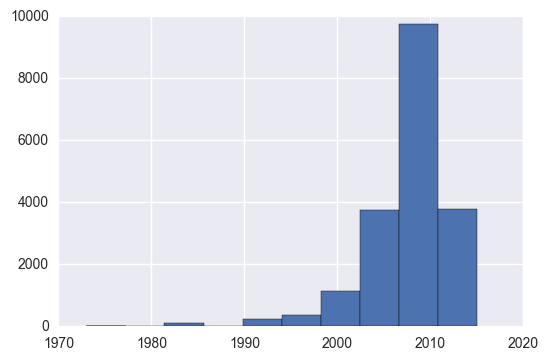

In [36]:
df.ANO_CONCLUSAO_2_GRAU.hist()

Separando os campos em outro DataFrame

In [37]:
df2 = df.loc[:, ['ANO_CONCLUSAO_2_GRAU','ANO_INGRESSO', 'SIT_MATRICULA']]
df2

,ANO_CONCLUSAO_2_GRAU,ANO_INGRESSO,SIT_MATRICULA
0,2014.0,2016,0
1,2011.0,2016,0
2,2011.0,2016,0
3,2014.0,2016,0
4,NaN,2016,0
5,2014.0,2016,0
6,2012.0,2016,0
7,2014.0,2015,0
8,NaN,2015,0
9,2013.0,2015,0


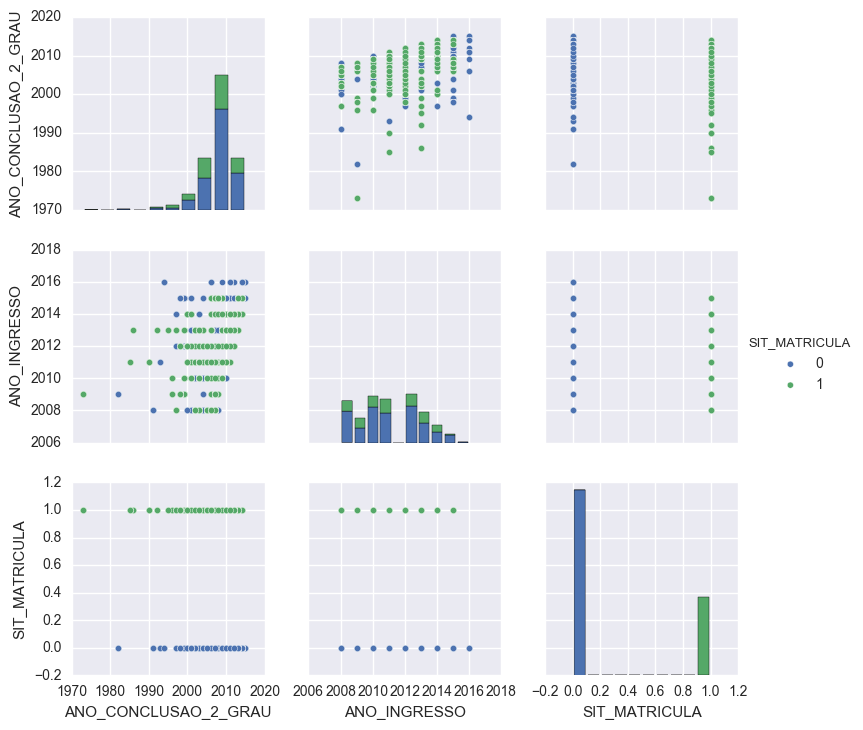

In [38]:
sb.pairplot(df2.dropna(), hue='SIT_MATRICULA')

In [39]:
df2.corr(method='spearman')

,ANO_CONCLUSAO_2_GRAU,ANO_INGRESSO,SIT_MATRICULA
ANO_CONCLUSAO_2_GRAU,1.000000,0.515777,-0.13248
ANO_INGRESSO,0.515777,1.000000,-0.05249
SIT_MATRICULA,-0.132480,-0.052490,1.00000


In [40]:
df.ANO_CONCLUSAO_2_GRAU.unique()

array([ 2014.,  2011.,    nan,  2012.,  2013.,  2010.,  2015.,  2009.,
        2006.,  2007.,  2008.,  2002.,  2004.,  2001.,  2003.,  1992.,
        1997.,  1995.,  1999.,  1986.,  2005.,  2000.,  1993.,  1996.,
        1982.,  1998.,  1973.,  1985.,  1990.,  1991.,  1994.])

In [41]:
df.ANO_INGRESSO.unique()

array([2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008])

In [42]:
df2 = df2.dropna()
df2.columns

Index([u'ANO_CONCLUSAO_2_GRAU', u'ANO_INGRESSO', u'SIT_MATRICULA'], dtype='object')

In [43]:
valores = df2[['ANO_CONCLUSAO_2_GRAU', 'ANO_INGRESSO', 'SIT_MATRICULA']].values
valores = valores.astype('int64')

In [44]:
features = valores[:, 1:3]
features

array([[2016,    0],
       [2016,    0],
       [2016,    0],
       ..., 
       [2012,    0],
       [2012,    0],
       [2012,    0]])

In [45]:
target = valores[:, np.newaxis, 0]
target

array([[2014],
       [2011],
       [2011],
       ..., 
       [2011],
       [2012],
       [2007]])

<h3>Regressão Linear</h3>

In [46]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
regr.predict([[2012, 0]])

array([[ 2008.72342296]])

In [48]:
regr.predict(df.loc[df.ANO_CONCLUSAO_2_GRAU.isnull(), ['ANO_INGRESSO', 'SIT_MATRICULA']])

array([[ 2011.79866197],
       [ 2011.02985221],
       [ 2011.02985221],
       ..., 
       [ 2009.49223271],
       [ 2007.95461321],
       [ 2005.64818395]])

<h3>Corrindo campo Notas</h3>

In [49]:
def input_ano_conclusao(row):   
    if row['ANO_CONCLUSAO_2_GRAU'] != 0:    
        return row['ANO_CONCLUSAO_2_GRAU']
    else:  
        r = regr.predict([[row['ANO_INGRESSO'], row['SIT_MATRICULA']]])
        return r[0][0].astype('int64')

In [50]:
df.loc[df.ANO_CONCLUSAO_2_GRAU.isnull(), 'ANO_CONCLUSAO_2_GRAU'] = 0
df_c = df.loc[:, ['ANO_INGRESSO', 'ANO_CONCLUSAO_2_GRAU', 'SIT_MATRICULA']]

df_c.SIT_MATRICULA = df_c.SIT_MATRICULA.astype('int64')
df_c.ANO_INGRESSO = df_c.ANO_INGRESSO.astype('int64')

df['ANO_CONCLUSAO_2_GRAU'] = df_c.apply(input_ano_conclusao, axis=1)

In [51]:
df.ANO_CONCLUSAO_2_GRAU.value_counts()

2007.0    2703
2008.0    2627
2009.0    2622
2006.0    2419
2010.0    2344
2011.0    1448
2012.0    1370
2004.0    1152
2005.0     971
2013.0     669
2002.0     499
2001.0     337
2014.0     320
2003.0     232
1997.0     176
2000.0     163
1999.0     142
1998.0     106
1992.0      77
1991.0      76
1982.0      66
1996.0      55
1990.0      49
1993.0      34
1985.0      32
1995.0      22
1986.0      20
1973.0      18
2015.0      16
1994.0       5
Name: ANO_CONCLUSAO_2_GRAU, dtype: int64

<h2>Corrindo campo Notas</h2>

In [52]:
df.NOTAS.unique()

array(['6.70', '10.00', '0.00', '1.30', '8.00', '0.50', '6.60', '0.70',
       '06/10/2016', '8.80', '09/10/2016', '6.00', '7.20', '7.30', '7.00',
       '7.50', '7.60', '8.50', '6.50', '5.70', '5.20', '7.90',
       '08/10/2016', '07/10/2016', '9.50', '7.70', '6.20', '5.00', '4.20',
       '5.60', '5.30', '5.80', '5.40', '9.70', '2.60', '9.00',
       '05/10/2016', '1.00', '5.90', '5.50', '1.50', '6.90', '7.80',
       '6.30', '6.80', '4.50', '6.40', '7.40', '9.60', '9.40', '8.90',
       '8.60', '3.20', '0.80', '8.40', '8.30', nan, '9.20', '4.80', '3.30',
       '3.50', '3.70', '2.30', '2.70', '8.70', '2.00', '9.80', '3.90',
       '2.50', '3.80', '9.90', '0.30', '4.60', '4.00', '1.40', '1.20',
       '1.90', '0.90', '1.80', '3.60', '01/10/2016', '1.60', '8.20',
       '2.20', '2.80', '9.30', '0.40', '0.10', '2.40', '4.70', '0.20',
       '4.40', '04/10/2016', '3.00', '4.90', '4.30', '1.70', '2.90',
       '3.40', '03/10/2016', '0.60', '02/10/2016', '80.00', '60.00'], dtype=object)

In [53]:
df.drop(df[df.NOTAS.str.contains("/", na=False)].index, inplace=True)

df.NOTAS = df.NOTAS.astype('float64')

df.loc[df.NOTAS.isnull(), 'NOTAS'] = 0

df.NOTAS.unique()

array([  6.7,  10. ,   0. ,   1.3,   8. ,   0.5,   6.6,   0.7,   8.8,
         6. ,   7.2,   7.3,   7. ,   7.5,   7.6,   8.5,   6.5,   5.7,
         5.2,   7.9,   9.5,   7.7,   6.2,   5. ,   4.2,   5.6,   5.3,
         5.8,   5.4,   9.7,   2.6,   9. ,   1. ,   5.9,   5.5,   1.5,
         6.9,   7.8,   6.3,   6.8,   4.5,   6.4,   7.4,   9.6,   9.4,
         8.9,   8.6,   3.2,   0.8,   8.4,   8.3,   9.2,   4.8,   3.3,
         3.5,   3.7,   2.3,   2.7,   8.7,   2. ,   9.8,   3.9,   2.5,
         3.8,   9.9,   0.3,   4.6,   4. ,   1.4,   1.2,   1.9,   0.9,
         1.8,   3.6,   1.6,   8.2,   2.2,   2.8,   9.3,   0.4,   0.1,
         2.4,   4.7,   0.2,   4.4,   3. ,   4.9,   4.3,   1.7,   2.9,
         3.4,   0.6,  80. ,  60. ])

In [54]:
def maior_que_dez(x):
    if(x>10):
        return x/10
    else:
        return x

    
df.NOTAS = df.loc[:,'NOTAS'].apply(maior_que_dez)  

df.NOTAS.unique()

array([  6.7,  10. ,   0. ,   1.3,   8. ,   0.5,   6.6,   0.7,   8.8,
         6. ,   7.2,   7.3,   7. ,   7.5,   7.6,   8.5,   6.5,   5.7,
         5.2,   7.9,   9.5,   7.7,   6.2,   5. ,   4.2,   5.6,   5.3,
         5.8,   5.4,   9.7,   2.6,   9. ,   1. ,   5.9,   5.5,   1.5,
         6.9,   7.8,   6.3,   6.8,   4.5,   6.4,   7.4,   9.6,   9.4,
         8.9,   8.6,   3.2,   0.8,   8.4,   8.3,   9.2,   4.8,   3.3,
         3.5,   3.7,   2.3,   2.7,   8.7,   2. ,   9.8,   3.9,   2.5,
         3.8,   9.9,   0.3,   4.6,   4. ,   1.4,   1.2,   1.9,   0.9,
         1.8,   3.6,   1.6,   8.2,   2.2,   2.8,   9.3,   0.4,   0.1,
         2.4,   4.7,   0.2,   4.4,   3. ,   4.9,   4.3,   1.7,   2.9,
         3.4,   0.6])

In [55]:
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'DESC_ESTADO', u'DESC_IDIOMA',
       u'NIVEL_FALA', u'NIVEL_COMPREENSAO', u'NIVEL_ESCRITA', u'NIVEL_LEITURA',
       u'NOTAS', u'N_FALTAS', u'COD_DISCIPLINA', u'CARGA_HOR', u'ANO_INGRESSO',
       u'IDADE_INGRESSO'],
      dtype='object')

In [56]:
df.describe()

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,COD_DISCIPLINA,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,19497.000000,19497.000000,19497.000000,9349.000000,11244.000000,11244.000000,11244.000000,11244.000000,19497.000000,17340.000000,19497.000000,19497.000000,19497.000000,19497.000000
mean,0.325794,2.463558,2007.380520,0.105359,1.755336,1.992085,1.810832,2.162753,6.076961,9.971107,10198.869467,51.861825,2010.867672,21.146843
std,0.468683,1.973542,4.223179,0.484375,0.756597,0.750006,0.732994,0.739609,2.939423,17.284984,4476.830247,15.240430,1.988872,5.103899
min,0.000000,0.000000,1973.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,648.000000,27.000000,2008.000000,16.000000
25%,0.000000,0.000000,2006.000000,NaN,NaN,NaN,NaN,NaN,5.300000,NaN,8587.000000,54.000000,2009.000000,18.000000
50%,0.000000,4.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,6.900000,NaN,9111.000000,54.000000,2011.000000,19.000000
75%,1.000000,4.000000,2010.000000,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,9134.000000,54.000000,2012.000000,22.000000
max,1.000000,6.000000,2015.000000,4.000000,3.000000,3.000000,3.000000,3.000000,10.000000,120.000000,24371.000000,81.000000,2016.000000,56.000000


<h2>Níveis das Linguas Estrangeiras</h2>

<p>1. Inglês, 2. Espanhol, 3. Francês</p>

In [57]:
df.NIVEL_FALA.unique()

array([  1.,   2.,  nan,   3.])

<p>Binarização: 1. Fala outra Lingua, 0. Não fala outra lingua</p>

In [58]:
df.loc[df.NIVEL_FALA.notnull(), 'NIVEL_FALA'] = 1
df.loc[df.NIVEL_FALA.isnull(),'NIVEL_FALA'] = 0

df.NIVEL_FALA = df.NIVEL_FALA.astype('int64')
df.NIVEL_FALA.unique()

array([1, 0])

In [59]:
df.loc[df.NIVEL_COMPREENSAO.notnull(), 'NIVEL_COMPREENSAO'] = 1
df.loc[df.NIVEL_COMPREENSAO.isnull(),'NIVEL_COMPREENSAO'] = 0

df.NIVEL_COMPREENSAO = df.NIVEL_COMPREENSAO.astype('int64')
df.NIVEL_COMPREENSAO.unique()

array([1, 0])

In [60]:
df.loc[df.NIVEL_ESCRITA.notnull(), 'NIVEL_ESCRITA'] = 1
df.loc[df.NIVEL_ESCRITA.isnull(),'NIVEL_ESCRITA'] = 0

df.NIVEL_ESCRITA = df.NIVEL_ESCRITA.astype('int64')
df.NIVEL_ESCRITA.unique()

array([1, 0])

In [61]:
df.loc[df.NIVEL_LEITURA.notnull(), 'NIVEL_LEITURA'] = 1
df.loc[df.NIVEL_LEITURA.isnull(),'NIVEL_LEITURA'] = 0

df.NIVEL_LEITURA = df.NIVEL_LEITURA.astype('int64')
df.NIVEL_LEITURA.unique()

array([1, 0])

In [62]:
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'DESC_ESTADO', u'DESC_IDIOMA',
       u'NIVEL_FALA', u'NIVEL_COMPREENSAO', u'NIVEL_ESCRITA', u'NIVEL_LEITURA',
       u'NOTAS', u'N_FALTAS', u'COD_DISCIPLINA', u'CARGA_HOR', u'ANO_INGRESSO',
       u'IDADE_INGRESSO'],
      dtype='object')

<h2>Código da Disciplina</h2>

<p>Identificador causa ruído</p>

In [63]:
df.drop('COD_DISCIPLINA', axis=1, inplace=True)
df.describe()

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO
count,19497.000000,19497.000000,19497.000000,9349.000000,19497.000000,19497.000000,19497.000000,19497.000000,19497.000000,17340.000000,19497.000000,19497.000000,19497.000000
mean,0.325794,2.463558,2007.380520,0.105359,0.576704,0.576704,0.576704,0.576704,6.076961,9.971107,51.861825,2010.867672,21.146843
std,0.468683,1.973542,4.223179,0.484375,0.494094,0.494094,0.494094,0.494094,2.939423,17.284984,15.240430,1.988872,5.103899
min,0.000000,0.000000,1973.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2008.000000,16.000000
25%,0.000000,0.000000,2006.000000,NaN,0.000000,0.000000,0.000000,0.000000,5.300000,NaN,54.000000,2009.000000,18.000000
50%,0.000000,4.000000,2008.000000,NaN,1.000000,1.000000,1.000000,1.000000,6.900000,NaN,54.000000,2011.000000,19.000000
75%,1.000000,4.000000,2010.000000,NaN,1.000000,1.000000,1.000000,1.000000,8.000000,NaN,54.000000,2012.000000,22.000000
max,1.000000,6.000000,2015.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,120.000000,81.000000,2016.000000,56.000000


<h2>Profissão do Aluno</h2>

In [64]:
df.PROFISSAO.unique()

array([nan, 'Estudante', 'T\xc3\xa9cnico',
       'T\xc3\xa9cnico em Telecomunica\xc3\xa7\xc3\xb5es',
       'T\xc3\xa9cnico em Eletromec\xc3\xa2nica', 'F\xc3\xadsico',
       'Agente Administrativo', 'ESTUDANTE', 'Militar',
       'Operador de Telemarketing', 'Eletricista', 'Instrumentista',
       'Professor', 'FUNCIONARIO PUBLICO', 'Designer Gr\xc3\xa1fico',
       'Tecn\xc3\xb3logo', 'Outros', 'Empres\xc3\xa1ria', 'ATENDENTE',
       'Autonomo', 'Eletrot\xc3\xa9cnico', 'Especialista T\xc3\xa9cnico',
       'Administrador de Redes', 'Programador',
       'Manipulador de Fotografia', 'Comerciante',
       'T\xc3\xa9cnico em Eletr\xc3\xb4nica', 'Analista de Suporte',
       'Agrimensor(a)', 'T\xc3\xa9cnico em Inform\xc3\xa1tica',
       'Funcionario Publico', 'M\xc3\x9aSICO', 'Aut\xc3\xb4noma',
       'Engenheiro de Produ\xc3\xa7\xc3\xa3o', 'Representante Comercial',
       'T\xc3\x89CNICO EM INFORM\xc3\x81TICA', 'AUTONOMO', 'COBRADOR',
       'T\xc3\xa9cnico em Mec\xc3\xa2nica', 'Aux

<p>
Binarização <br>
Profissão = 1. TRABALHA <br>
Profissão = 0. NAO TRABALHA
</p>

In [65]:
df.loc[df.PROFISSAO == 'Estudante', 'PROFISSAO'] = 0
df.loc[df.PROFISSAO == 'ESTUDANTE', 'PROFISSAO'] = 0

df.loc[df.PROFISSAO.notnull(),'PROFISSAO'] = 1
df.loc[df.PROFISSAO.isnull(),'PROFISSAO'] = 0

df.PROFISSAO.unique()

array([0, 1], dtype=object)

<h2>Avaliando se o Aluno foi Aprovado ou Reprovado</h2>

<p>Verificando dados de número de faltas </p>

In [66]:
df.N_FALTAS.head()

0     NaN
1     NaN
2     NaN
3    70.0
4    70.0
Name: N_FALTAS, dtype: float64

In [67]:
df.N_FALTAS.unique()

array([  nan,   70.,    8.,   10.,   12.,    4.,    0.,   66.,    2.,
         68.,   56.,   22.,   64.,   26.,   20.,    6.,   46.,   74.,
         28.,   32.,   42.,   40.,   60.,   62.,   44.,   72.,   30.,
         18.,   24.,   16.,    7.,   14.,   48.,   38.,    3.,   27.,
         57.,   21.,   34.,   36.,   58.,   17.,   13.,   50.,   86.,
         19.,   23.,   65.,   76.,   15.,    9.,   61.,    5.,   11.,
         52.,   71.,   63.,    1.,   54.,   78.,  100.,  108.,   55.,
         81.,  102.,   41.,   31.,   51.,   35.,   88.,   96.,   99.,
         79.,   98.,   94.,  104.,   80.,   82.,   77.,  114.,   84.,
        110.,  112.,   90.,   25.,   37.,   39.,   47.,   33.,   75.,
        120.,   29.,   73.,   92.,   67.,  106.,   69.])

In [68]:
df.loc[df.N_FALTAS.isnull(),'N_FALTAS'] = 0
df.N_FALTAS.unique()

array([   0.,   70.,    8.,   10.,   12.,    4.,   66.,    2.,   68.,
         56.,   22.,   64.,   26.,   20.,    6.,   46.,   74.,   28.,
         32.,   42.,   40.,   60.,   62.,   44.,   72.,   30.,   18.,
         24.,   16.,    7.,   14.,   48.,   38.,    3.,   27.,   57.,
         21.,   34.,   36.,   58.,   17.,   13.,   50.,   86.,   19.,
         23.,   65.,   76.,   15.,    9.,   61.,    5.,   11.,   52.,
         71.,   63.,    1.,   54.,   78.,  100.,  108.,   55.,   81.,
        102.,   41.,   31.,   51.,   35.,   88.,   96.,   99.,   79.,
         98.,   94.,  104.,   80.,   82.,   77.,  114.,   84.,  110.,
        112.,   90.,   25.,   37.,   39.,   47.,   33.,   75.,  120.,
         29.,   73.,   92.,   67.,  106.,   69.])

<p>Verificando dados de carga horária </p>

In [69]:
df.CARGA_HOR.unique()

array([54, 81, 27])

<p>
Criando nova coluna binária <br>
1. Aprovado e 0. Reprovado</p>

<p>Uma hora igual a 60 minutos e uma aula igual a 45 minutos</p>

In [70]:
def verifica_aprovacao(row):
    qtd_aulas = (row['CARGA_HOR'] * 60) / 45
    porc_faltas = (row['N_FALTAS'] * 100) / qtd_aulas
    
    if(porc_faltas <= 25 and row['NOTAS'] >= 6.0):
        return 1
    else:
        return 0

In [71]:
df2 = df.loc[:, ['NOTAS', 'N_FALTAS', 'CARGA_HOR']]
df['APROVACAO'] = df2.apply(verifica_aprovacao, axis=1)
df.APROVACAO.unique()

array([1, 0])

In [72]:
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'DESC_ESTADO', u'DESC_IDIOMA',
       u'NIVEL_FALA', u'NIVEL_COMPREENSAO', u'NIVEL_ESCRITA', u'NIVEL_LEITURA',
       u'NOTAS', u'N_FALTAS', u'CARGA_HOR', u'ANO_INGRESSO', u'IDADE_INGRESSO',
       u'APROVACAO'],
      dtype='object')

<h2>Escola de Origem</h2>

In [73]:
df.TIPO_ESCOLA_ORIGEM.unique()

array(['E', 'P', nan, 'F', 'I', 'O', 'M', 'C', '0'], dtype=object)

In [74]:
df.drop(df[df.TIPO_ESCOLA_ORIGEM.isnull()].index, inplace=True)
df.drop(df[df.TIPO_ESCOLA_ORIGEM.str.contains('0', na=False)].index, inplace=True)
df.TIPO_ESCOLA_ORIGEM.unique()

array(['E', 'P', 'F', 'I', 'O', 'M', 'C'], dtype=object)

<p>Discretização <br>
1. E, 2. F, 3. I, 4. O, 5. M, 6. P, 7. </p>

<p>Conclusão
Foi avaliado os dois casos, não houve perda de desempenho <br>
em nenhuma das normalização aplicada</p>

In [75]:
df.loc[df.TIPO_ESCOLA_ORIGEM == 'E', 'TIPO_ESCOLA_ORIGEM'] = 1
df.loc[df.TIPO_ESCOLA_ORIGEM == 'F', 'TIPO_ESCOLA_ORIGEM'] = 2
df.loc[df.TIPO_ESCOLA_ORIGEM == 'I', 'TIPO_ESCOLA_ORIGEM'] = 3
df.loc[df.TIPO_ESCOLA_ORIGEM == 'O', 'TIPO_ESCOLA_ORIGEM'] = 4
df.loc[df.TIPO_ESCOLA_ORIGEM == 'M', 'TIPO_ESCOLA_ORIGEM'] = 5
df.loc[df.TIPO_ESCOLA_ORIGEM == 'P', 'TIPO_ESCOLA_ORIGEM'] = 6
df.loc[df.TIPO_ESCOLA_ORIGEM == 'C', 'TIPO_ESCOLA_ORIGEM'] = 7

df.TIPO_ESCOLA_ORIGEM.unique()

array([1, 6, 2, 3, 4, 5, 7], dtype=object)

In [76]:
df.describe()

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,N_FILHOS,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO,APROVACAO
count,18673.000000,18673.000000,18673.000000,9031.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000
mean,0.324104,2.440743,2007.514861,0.109069,0.579286,0.579286,0.579286,0.579286,6.071885,8.896053,51.860012,2010.884700,21.051947,0.720291
std,0.468052,1.966878,3.877959,0.492420,0.493687,0.493687,0.493687,0.493687,2.946144,16.533047,15.232112,1.978932,4.843953,0.448868
min,0.000000,0.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2008.000000,16.000000,0.000000
25%,0.000000,0.000000,2006.000000,NaN,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000,54.000000,2009.000000,18.000000,0.000000
50%,0.000000,4.000000,2008.000000,NaN,1.000000,1.000000,1.000000,1.000000,6.900000,2.000000,54.000000,2011.000000,19.000000,1.000000
75%,1.000000,4.000000,2010.000000,NaN,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,54.000000,2012.000000,22.000000,1.000000
max,1.000000,6.000000,2015.000000,4.000000,1.000000,1.000000,1.000000,1.000000,10.000000,120.000000,81.000000,2016.000000,53.000000,1.000000


In [77]:
len(df.loc[:, 'TIPO_ESCOLA_ORIGEM'])

18673

<h2>Estado Cívil do Aluno</h2>

In [78]:
df.COD_ESTADO_CIVIL.unique()

array(['S', nan, 'C', 'UE'], dtype=object)

In [79]:
df.loc[df.COD_ESTADO_CIVIL.isnull(), 'SIT_MATRICULA']

1        0
2        0
3        0
6        0
10       0
12       0
13       0
17       0
19       0
23       0
25       0
26       0
27       0
28       0
29       0
30       1
31       0
32       0
33       0
35       0
41       0
42       0
50       0
51       0
52       1
53       1
55       0
56       0
68       0
71       0
        ..
20453    1
20459    0
20460    0
20473    1
20476    0
20483    1
20484    1
20486    1
20503    0
20504    0
20505    0
20506    0
20527    0
20656    0
20657    0
20661    0
20662    0
20664    0
20667    1
20669    1
20691    0
20709    0
20710    0
20714    0
20715    0
20716    0
20717    0
20758    0
20759    0
20761    0
Name: SIT_MATRICULA, dtype: int64

In [80]:
df2 = df.loc[:, ['COD_ESTADO_CIVIL', 'SIT_MATRICULA']]
df2.corr(method='spearman')

,SIT_MATRICULA
SIT_MATRICULA,1.0


In [81]:
len(df.loc[df.COD_ESTADO_CIVIL.isnull(), 'COD_ESTADO_CIVIL'])

1909

<p>Binarização <br>
1. Casado, 0. Solteriro</p>

In [82]:
df.loc[df.COD_ESTADO_CIVIL.isnull(), 'COD_ESTADO_CIVIL'] = 0
df.drop(df[df.COD_ESTADO_CIVIL.isnull()].index, inplace=True)
df.loc[df.COD_ESTADO_CIVIL=='S', 'COD_ESTADO_CIVIL'] = 0
df.loc[df.COD_ESTADO_CIVIL=='UE', 'COD_ESTADO_CIVIL'] = 1 
df.loc[df.COD_ESTADO_CIVIL=='C', 'COD_ESTADO_CIVIL'] = 1

df.COD_ESTADO_CIVIL = df.COD_ESTADO_CIVIL.astype('int64')
df.COD_ESTADO_CIVIL.unique()

array([0, 1])

<h2>Quantidade de Filhos</h2>

In [83]:
df.N_FILHOS.unique()

array([ nan,   0.,   1.,   2.,   3.,   4.])

In [84]:
len(df.loc[df.N_FILHOS.isnull(), 'N_FILHOS'])

9642

In [85]:
df.loc[df.N_FILHOS.isnull(), 'N_FILHOS'] = 0
#df.drop(df[df.N_FILHOS.isnull()].index, inplace=True)
df.N_FILHOS = df.N_FILHOS.astype('int64')

df.N_FILHOS.unique()

array([0, 1, 2, 3, 4])

<h2>Sexo</h2>

In [86]:
df.SEXO.unique()

array(['M', 'F'], dtype=object)

In [87]:
df.loc[df.SEXO=='F', 'SEXO'] = 0
df.loc[df.SEXO=='M', 'SEXO'] = 1
df.SEXO = df.SEXO.astype('int64')
df.SEXO.unique()

array([1, 0])

<h2>Campo de Descrições</h2>

In [88]:
df.drop('DESC_ESTADO', axis=1, inplace=True)
df.drop('DESC_IDIOMA', axis=1, inplace=True)
df.describe()

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,COD_ESTADO_CIVIL,N_FILHOS,SEXO,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO,APROVACAO
count,18673.000000,18673.000000,18673.000000,18673.000000,18673.00000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000
mean,0.324104,2.440743,2007.514861,0.057838,0.05275,0.855353,0.579286,0.579286,0.579286,0.579286,6.071885,8.896053,51.860012,2010.884700,21.051947,0.720291
std,0.468052,1.966878,3.877959,0.233442,0.34675,0.351754,0.493687,0.493687,0.493687,0.493687,2.946144,16.533047,15.232112,1.978932,4.843953,0.448868
min,0.000000,0.000000,1985.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2008.000000,16.000000,0.000000
25%,0.000000,0.000000,2006.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000,54.000000,2009.000000,18.000000,0.000000
50%,0.000000,4.000000,2008.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,6.900000,2.000000,54.000000,2011.000000,19.000000,1.000000
75%,1.000000,4.000000,2010.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,54.000000,2012.000000,22.000000,1.000000
max,1.000000,6.000000,2015.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,120.000000,81.000000,2016.000000,53.000000,1.000000


<h2>Binarizando Descrição da Cidade</h2>

In [89]:
df.DESC_CIDADE.unique()

array(['Goi\xc3\xa2nia', 'Goiania', 'Trindade', 'Parauapebas',
       'Itapuranga', 'Aparecida de Goi\xc3\xa2nia', 'Caiap\xc3\xb4nia',
       'Inhumas', 'An\xc3\xa1polis', 'Gurupi', 'Senador Canedo',
       'Barro Alto', 'Ceres', 'Ipor\xc3\xa1', 'Ner\xc3\xb3polis',
       'Mina\xc3\xa7u', 'Imperatriz',
       'Santo Ant\xc3\xb4nio de Goi\xc3\xa1s', 'Jata\xc3\xad',
       'Goi\xc3\xa1s', 'Varj\xc3\xa3o', 'Orizona', 'Santa Rosa (formosa)',
       'Cidade de Goi\xc3\xa1s', 'Alto Para\xc3\xadso de Goi\xc3\xa1s',
       'Santa Helena de Goi\xc3\xa1s', 'Bela Vista de Goi\xc3\xa1s',
       'Rio Verde', 'Bom Jesus de Goi\xc3\xa1s', 'Aragoi\xc3\xa2nia',
       'Araguari', 'Urua\xc3\xa7u', 'Anicuns',
       'S\xc3\xa3o Miguel do Araguaia', 'Guap\xc3\xb3'], dtype=object)

In [90]:
df.loc[df.DESC_CIDADE == 'Goiânia', 'DESC_CIDADE'] = 0
df.loc[df.DESC_CIDADE == 'Goiania', 'DESC_CIDADE'] = 0
df.loc[df.DESC_CIDADE != 0, 'DESC_CIDADE'] = 1

df.DESC_CIDADE.unique()

array([0, 1], dtype=object)

<h2>Idade de Ingresso</h2>

In [91]:
df.IDADE_INGRESSO = df.IDADE_INGRESSO.astype('int64')
df.IDADE_INGRESSO.unique()

array([20, 21, 18, 22, 19, 17, 23, 27, 25, 29, 26, 30, 24, 51, 16, 34, 28,
       50, 35, 32, 43, 31, 39, 37, 36, 41, 48, 44, 33, 53])

<p>  >= 45 = 3 <br>
>= 30 = 2<br>
>= 20 = 1<br>
>= 15 = 0</p>

In [92]:
df.loc[df.IDADE_INGRESSO >= 45, 'IDADE_INGRESSO'] = 3
df.loc[df.IDADE_INGRESSO >= 30, 'IDADE_INGRESSO'] = 2
df.loc[df.IDADE_INGRESSO >= 20, 'IDADE_INGRESSO'] = 1
df.loc[df.IDADE_INGRESSO >= 15, 'IDADE_INGRESSO'] = 0
df.IDADE_INGRESSO.unique()

array([1, 0, 2, 3])

In [93]:
df = df.dropna()
df.describe()

,SIT_MATRICULA,RENDA_FAMILIAR,ANO_CONCLUSAO_2_GRAU,COD_ESTADO_CIVIL,N_FILHOS,SEXO,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,CARGA_HOR,ANO_INGRESSO,IDADE_INGRESSO,APROVACAO
count,18673.000000,18673.000000,18673.000000,18673.000000,18673.00000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000
mean,0.324104,2.440743,2007.514861,0.057838,0.05275,0.855353,0.579286,0.579286,0.579286,0.579286,6.071885,8.896053,51.860012,2010.884700,0.539817,0.720291
std,0.468052,1.966878,3.877959,0.233442,0.34675,0.351754,0.493687,0.493687,0.493687,0.493687,2.946144,16.533047,15.232112,1.978932,0.613013,0.448868
min,0.000000,0.000000,1985.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2008.000000,0.000000,0.000000
25%,0.000000,0.000000,2006.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000,54.000000,2009.000000,0.000000,0.000000
50%,0.000000,4.000000,2008.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,6.900000,2.000000,54.000000,2011.000000,0.000000,1.000000
75%,1.000000,4.000000,2010.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,54.000000,2012.000000,1.000000,1.000000
max,1.000000,6.000000,2015.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,120.000000,81.000000,2016.000000,3.000000,1.000000


In [94]:
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'NIVEL_FALA', u'NIVEL_COMPREENSAO',
       u'NIVEL_ESCRITA', u'NIVEL_LEITURA', u'NOTAS', u'N_FALTAS', u'CARGA_HOR',
       u'ANO_INGRESSO', u'IDADE_INGRESSO', u'APROVACAO'],
      dtype='object')

<h2>Validando Todas as features</h2>

In [95]:
df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'NIVEL_FALA', u'NIVEL_COMPREENSAO',
       u'NIVEL_ESCRITA', u'NIVEL_LEITURA', u'NOTAS', u'N_FALTAS', u'CARGA_HOR',
       u'ANO_INGRESSO', u'IDADE_INGRESSO', u'APROVACAO'],
      dtype='object')

In [96]:
df.drop('CARGA_HOR', axis=1, inplace=True)

df.columns

Index([u'SIT_MATRICULA', u'RENDA_FAMILIAR', u'TIPO_ESCOLA_ORIGEM',
       u'ANO_CONCLUSAO_2_GRAU', u'COD_ESTADO_CIVIL', u'N_FILHOS', u'SEXO',
       u'PROFISSAO', u'DESC_CIDADE', u'NIVEL_FALA', u'NIVEL_COMPREENSAO',
       u'NIVEL_ESCRITA', u'NIVEL_LEITURA', u'NOTAS', u'N_FALTAS',
       u'ANO_INGRESSO', u'IDADE_INGRESSO', u'APROVACAO'],
      dtype='object')

In [97]:
df.dtypes

SIT_MATRICULA             int64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM       object
ANO_CONCLUSAO_2_GRAU    float64
COD_ESTADO_CIVIL          int64
N_FILHOS                  int64
SEXO                      int64
PROFISSAO                object
DESC_CIDADE              object
NIVEL_FALA                int64
NIVEL_COMPREENSAO         int64
NIVEL_ESCRITA             int64
NIVEL_LEITURA             int64
NOTAS                   float64
N_FALTAS                float64
ANO_INGRESSO              int64
IDADE_INGRESSO            int64
APROVACAO                 int64
dtype: object

In [98]:
df.TIPO_ESCOLA_ORIGEM = df.TIPO_ESCOLA_ORIGEM.astype('int64')
df.ANO_CONCLUSAO_2_GRAU = df.ANO_CONCLUSAO_2_GRAU.astype('int64')
df.PROFISSAO = df.PROFISSAO.astype('int64')
df.N_FALTAS = df.N_FALTAS.astype('int64')
df.dtypes

SIT_MATRICULA             int64
RENDA_FAMILIAR          float64
TIPO_ESCOLA_ORIGEM        int64
ANO_CONCLUSAO_2_GRAU      int64
COD_ESTADO_CIVIL          int64
N_FILHOS                  int64
SEXO                      int64
PROFISSAO                 int64
DESC_CIDADE              object
NIVEL_FALA                int64
NIVEL_COMPREENSAO         int64
NIVEL_ESCRITA             int64
NIVEL_LEITURA             int64
NOTAS                   float64
N_FALTAS                  int64
ANO_INGRESSO              int64
IDADE_INGRESSO            int64
APROVACAO                 int64
dtype: object

In [99]:
df.shape

(18673, 18)

<h2>Prepando os Dados para Predição</h2>

In [100]:
valores = df.values
target_evasao = df[['SIT_MATRICULA']].values
target_aprovacao = df[['APROVACAO']].values

In [101]:
X = valores[:, 1:17]
X

array([[4.0, 1, 2014, ..., 0, 2016, 1],
       [0.0, 6, 2011, ..., 0, 2016, 1],
       [0.0, 6, 2011, ..., 0, 2016, 1],
       ..., 
       [0.0, 6, 2011, ..., 0, 2012, 0],
       [0.0, 6, 2012, ..., 0, 2012, 0],
       [4.0, 1, 2007, ..., 0, 2012, 1]], dtype=object)

In [102]:
y = target_evasao.ravel()
y

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
z = target_aprovacao.ravel()
z

array([1, 1, 1, ..., 1, 1, 1])

<h2>Sepando conjunto de treinamento - Acurácia (Problema da Evasão)</h2>

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2>k-NN (Problema da Evasão)</h2>

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(n_neighbors=3, p=2)

In [108]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [109]:
knn.score(X_test, y_test)

0.88299866131191429

<h2>Arvore de Descisão (Predição de Evasão)</h2>

In [110]:
from sklearn import tree

In [111]:
dtc = tree.DecisionTreeClassifier()

In [112]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [113]:
dtc.score(X_test, y_test)

0.95796519410977243

<h2>SVM (Predição de Evasão)</h2>

In [114]:
from sklearn import svm

In [115]:
svm = svm.SVC()

In [116]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [117]:
svm.score(X_test, y_test)

0.84176706827309233

<h2>Sepando conjunto de treinamento - Acurácia (Problema da Aprovação)</h2>

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, z_train, z_test=train_test_split(X, z, test_size=0.3)

<h2>k-NN (Problema da Aprovação)</h2>

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn = KNeighborsClassifier(n_neighbors=133, p=2)

In [122]:
knn.fit(X_train,z_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=133, p=2,
           weights='uniform')

In [123]:
knn.score(X_test, z_test)

0.93020349875044628

<h2>Arvore de Descisão (Predição de Aprovação)</h2>

In [124]:
from sklearn import tree

In [125]:
dtc = tree.DecisionTreeClassifier()

In [126]:
dtc.fit(X_train, z_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [127]:
dtc.score(X_test, z_test)

0.98875401642270622

<h2>SVM (Predição de Aprovação)</h2>

In [128]:
from sklearn import svm

In [129]:
svm = svm.SVC()

In [130]:
svm.fit(X_train, z_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [131]:
svm.score(X_test, z_test)

0.98268475544448408

<h2>Finalizando o Trabalho</h2>

In [132]:
df.dropna().describe()

,SIT_MATRICULA,RENDA_FAMILIAR,TIPO_ESCOLA_ORIGEM,ANO_CONCLUSAO_2_GRAU,COD_ESTADO_CIVIL,N_FILHOS,SEXO,PROFISSAO,NIVEL_FALA,NIVEL_COMPREENSAO,NIVEL_ESCRITA,NIVEL_LEITURA,NOTAS,N_FALTAS,ANO_INGRESSO,IDADE_INGRESSO,APROVACAO
count,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.00000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000,18673.000000
mean,0.324104,2.440743,3.814706,2007.514861,0.057838,0.05275,0.855353,0.522091,0.579286,0.579286,0.579286,0.579286,6.071885,8.896053,2010.884700,0.539817,0.720291
std,0.468052,1.966878,2.335905,3.877959,0.233442,0.34675,0.351754,0.499525,0.493687,0.493687,0.493687,0.493687,2.946144,16.533047,1.978932,0.613013,0.448868
min,0.000000,0.000000,1.000000,1985.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2006.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.300000,0.000000,2009.000000,0.000000,0.000000
50%,0.000000,4.000000,6.000000,2008.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.900000,2.000000,2011.000000,0.000000,1.000000
75%,1.000000,4.000000,6.000000,2010.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,10.000000,2012.000000,1.000000,1.000000
max,1.000000,6.000000,7.000000,2015.000000,1.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,120.000000,2016.000000,3.000000,1.000000


In [133]:
df.to_csv('curso_clean.csv')